# 🌍 Satellite Image Classification with CNN
This notebook trains a Convolutional Neural Network (CNN) to classify satellite images using the EuroSAT dataset. It's ideal for showcasing basic deep learning skills.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras import Input
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Prepare the data
data_path = './data/2750'
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
# Build the CNN model
model = models.Sequential([
    Input(shape=(64, 64, 3)),  # Define explicitamente o input aqui
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\jvict\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

c:\Users\jvict\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 385s 565ms/step - accuracy: 0.4299 - loss: 1.4794 - val_accuracy: 0.6822 - val_loss: 0.8537
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 89s 131ms/step - accuracy: 0.7118 - loss: 0.8072 - val_accuracy: 0.7344 - val_loss: 0.7148
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 83s 123ms/step - accuracy: 0.7779 - loss: 0.6204 - val_accuracy: 0.7817 - val_loss: 0.5940
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 57s 85ms/step - accuracy: 0.8092 - loss: 0.5278 - val_accuracy: 0.8033 - val_loss: 0.5562
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 59s 88ms/step - accuracy: 0.8408 - loss: 0.4456 - val_accuracy: 0.8030 - val_loss: 0.5577
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 89ms/step - accuracy: 0.8598 - loss: 0.3927 - val_accuracy: 0.7946 - val_loss: 0.5978
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 75s 112ms/step - accuracy: 0.8779 - loss: 0.3467 - val_accuracy: 0.8109 - val_loss: 0.5464
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 78s 116ms/step - accuracy: 0.8989 - loss: 0.2

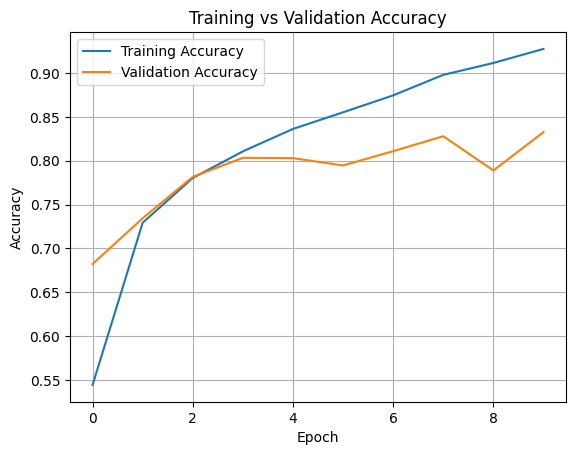

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training vs Validation Accuracy')
plt.show()